In [124]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [125]:
def clean_data(data,columns):

    data_clean = data.drop(columns,axis = 1)
    return data_clean

columns = ['Ticket','Cabin','Embarked']

data_clean = clean_data(train_data,columns)
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [126]:
#Creating the median age for the unknown values 

pd.isnull(data_clean['Age']).sum() #The number of indidivuals with unknown age
data_clean['Age'].fillna(data_clean['Age'].median(),inplace= True) #The median age

In [127]:
pd.isnull(data_clean).sum() == 0 #All the values have been thus assigned

PassengerId    True
Survived       True
Pclass         True
Name           True
Sex            True
Age            True
SibSp          True
Parch          True
Fare           True
dtype: bool

In [128]:
replacement_values = {'male': 1, 
                      'female': 0}
data_clean['Sex'] = data_clean['Sex'].replace(replacement_values)

data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


In [129]:
titanic_model = DecisionTreeRegressor(random_state=1)

In [130]:
columns = ['Sex','Fare','Age']
X = data_clean[columns]
X.describe()
Y = data_clean['Survived']

titanic_model.fit(X,Y)

DecisionTreeRegressor(random_state=1)

In [131]:
print('Survival prediction for the following:')
print(X.head())
titanic_model.predict(X.head(10))

Survival prediction for the following:
   Sex     Fare   Age
0    1   7.2500  22.0
1    0  71.2833  38.0
2    0   7.9250  26.0
3    0  53.1000  35.0
4    1   8.0500  35.0


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

### Splitting the training data into a test set and training set

In [132]:
from sklearn.model_selection import train_test_split

#So in this particular case we're splitting up the training data 
#THis is important as we can train the model and then compare the results to the test half of the data 

train_X, val_X, train_Y, val_Y = train_test_split(X,Y,random_state=1, test_size=0.25, shuffle = True) #Split the model into Training data and test

### Using the split data to work out the perfect number of tree nodes! Finding sweet spot

In [133]:
def get_mae(max_leaf_nodes,train_X,val_X,train_Y,val_Y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 1)
    model.fit(train_X,train_Y)
    pred_val = model.predict(val_X)
    mae = mean_absolute_error(val_Y,pred_val)
    return mae

In [140]:
nodes = [5,25,50,100,150,200,300,400,500,1000]
mae_values = []
for node in nodes:
    mae_values.append(get_mae(node,train_X,val_X,train_Y,val_Y))

print(mae_values)

[0.3178780341181764, 0.2837804969098837, 0.27971873555001275, 0.2800204419967292, 0.2783499378967871, 0.2730941704035874, 0.2730941704035874, 0.2730941704035874, 0.2730941704035874, 0.2730941704035874]


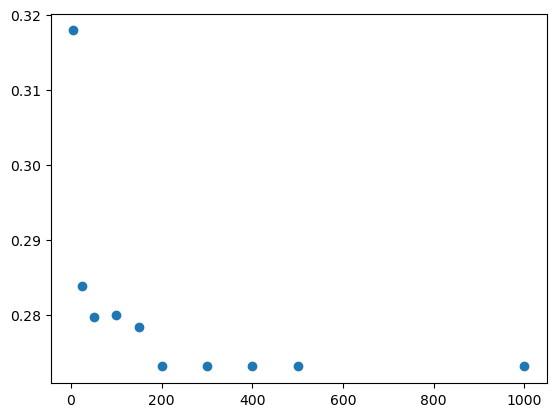

In [143]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(nodes,mae_values,'o')

#SO once it hits 200 nodes the the model is fairly good at making the predictions

## Using random forests

In [149]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(train_X,train_Y)

mean_diff = mean_absolute_error(rf_model.predict(val_X),val_Y)
print("The mean error for this Random Forest: {}".format(mean_diff))


The mean error for this Random Forest: 0.26859093820977226


In [114]:
Women = train_data[train_data['Sex']=='female']["Survived"]
rate_women = sum(Women)/len(Women)

women_sentence = "Percentage of women who survived: {}".format(rate_women*100)
print(women_sentence)

Percentage of women who survived: 74.20382165605095


In [79]:
Men = train_data[train_data['Sex']=='male']['Survived']
rate_men = sum(Men)/len(Men)
men_sentence = "Percentage of men who survived: {}".format(rate_men*100)
print(men_sentence)

Percentage of men who survived: 18.890814558058924
